Mean shoreline transgression rate (m/yr): 6.384333333333333
Median shoreline transgression rate (m/yr): 5.02
Standard deviation of shoreline transgression rate: 6.748750839147115 

Mean organic carbon density (kg OC/m^3): 7.551000000000001
Median organic carbon density (kg OC/m^3): 7.55
Standard deviation of organic carbon density: 1.3279265792957078 

Mean total lagoon OC eroded (Gg OC/yr): 2.470666666666667
Median total lagoon OC eroded (Gg OC/yr): 2.13
Standard deviation of total lagoon OC eroded (Gg OC/yr) 2.5407438980652017


Text(0.5, 1.0, 'Total lagoon OC eroded (Gg OC/yr) occurances')

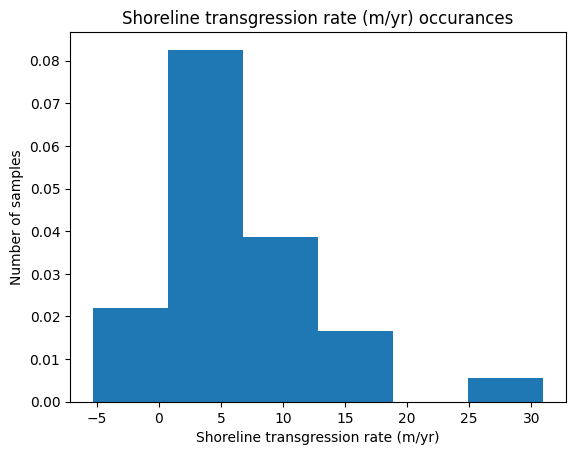

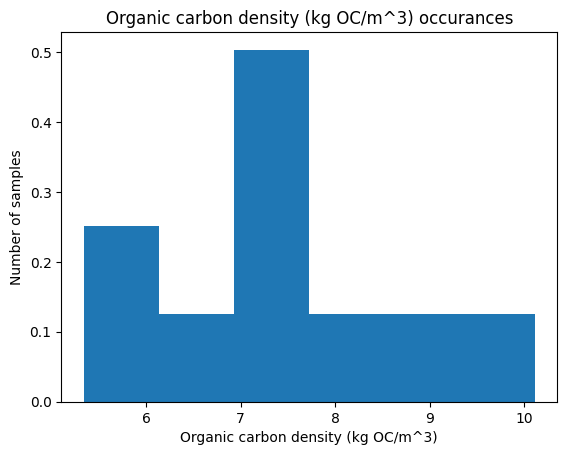

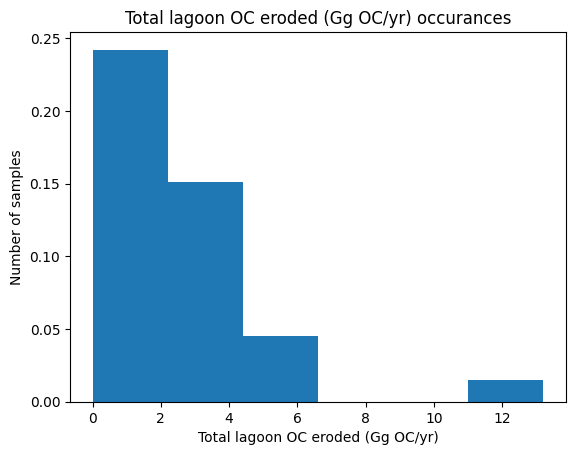

In [81]:
#Data_Description
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

filename = 'ShoreErosionLagoon.tsv'
df = pd.read_csv(filename, sep='\t')

#Shoreline transgression rate mean, median, mode
column_5 = df.columns[5]
df[column_5] = pd.to_numeric(df[column_5])
transgression_rate = df[column_5]

transgression_rate_mean = np.mean(transgression_rate)
transgression_rate_median = np.median(transgression_rate)
transgression_rate_stdv = np.std(transgression_rate)

#Lagoon organic carbon density mean, median, mode
column_9 = df.columns[9]
df[column_9] = pd.to_numeric(df[column_9])
oc = df[column_9]

oc_mean = np.mean(oc)
oc_median = np.median(oc)
oc_stdv = np.std(oc)

#Total eroded lagoon oc mean, median, mode
column_11 = df.columns[11]
df[column_11] = pd.to_numeric(df[column_11])
tot_eroded = df[column_11]

tot_eroded_mean = np.mean(tot_eroded)
tot_eroded_median = np.median(tot_eroded)
tot_eroded_stdv = np.std(tot_eroded)

#Print results
print("Mean shoreline transgression rate (m/yr):", transgression_rate_mean)
print("Median shoreline transgression rate (m/yr):", transgression_rate_median)
print("Standard deviation of shoreline transgression rate:", transgression_rate_stdv, "\n")
print("Mean organic carbon density (kg OC/m^3):", oc_mean)
print("Median organic carbon density (kg OC/m^3):", oc_median)
print("Standard deviation of organic carbon density:", oc_stdv, "\n")
print("Mean total lagoon OC eroded (Gg OC/yr):", tot_eroded_mean)
print("Median total lagoon OC eroded (Gg OC/yr):", tot_eroded_median)
print("Standard deviation of total lagoon OC eroded (Gg OC/yr)", tot_eroded_stdv)

#Histograms
x = df[column_5]
fig,ax = plt.subplots()
ax.hist(x, bins=6, density=True)
ax.set_xlabel("Shoreline transgression rate (m/yr)")
ax.set_ylabel("Number of samples")
ax.set_title("Shoreline transgression rate (m/yr) occurances")

y = df[column_9]
fig,ax = plt.subplots()
ax.hist(y, bins=6, density=True)
ax.set_xlabel("Organic carbon density (kg OC/m^3)")
ax.set_ylabel("Number of samples")
ax.set_title("Organic carbon density (kg OC/m^3) occurances")


z = df[column_11]
fig,ax = plt.subplots()
ax.hist(z, bins=6, density=True)
ax.set_xlabel("Total lagoon OC eroded (Gg OC/yr)")
ax.set_ylabel("Number of samples")
ax.set_title("Total lagoon OC eroded (Gg OC/yr) occurances")

Pearson correlation coefficient:
r = 0.6752401824828954
p = 4.2468870339863094e-05 

Spearman correlation coefficient:
r = 0.9001009093253012
p = 1.2989589611919408e-11

 Linear regression: y =  0.2542x + 0.8477


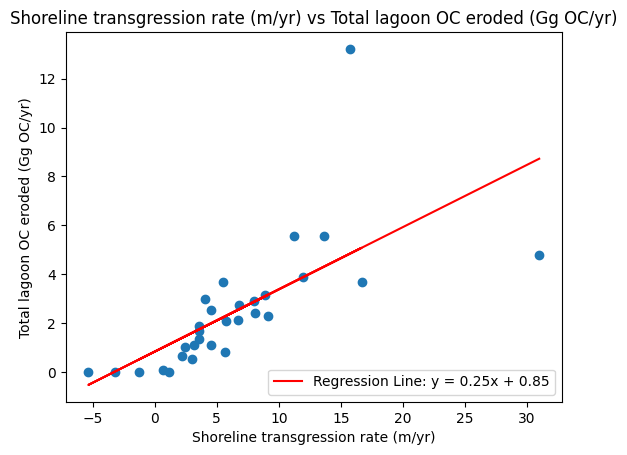

In [82]:
#Correlation
import csv
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

filename = 'ShoreErosionLagoon.tsv'
df = pd.read_csv(filename, sep='\t')

#Pearson/spearman coefs
column_5 = df.columns[5]
df[column_5] = pd.to_numeric(df[column_5])
x = df[column_5]

column_11 = df.columns[11]
df[column_11] = pd.to_numeric(df[column_11])
y = df[column_11]

PearsonTest=stats.pearsonr(x, y)
print("Pearson correlation coefficient:")
print("r =", PearsonTest.statistic)
print("p =", PearsonTest.pvalue, "\n")

SPTest=stats.spearmanr(x, y)
print("Spearman correlation coefficient:")
print("r =", SPTest.statistic)
print("p =", SPTest.pvalue)

#Scatter plots
fig,ax = plt.subplots()
ax.scatter(x, y)

LR = stats.linregress(x, y)
print("\n Linear regression: y = ", str(np.round(LR.slope, decimals=4))+"x +", str(np.round(LR.intercept, decimals=4)))
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')

ax.set_xlabel("Shoreline transgression rate (m/yr)")
ax.set_ylabel("Total lagoon OC eroded (Gg OC/yr)")
ax.set_title("Shoreline transgression rate (m/yr) vs Total lagoon OC eroded (Gg OC/yr)")
plt.legend()


StandardScaler()


Text(0.5, 1.0, 'Erosion and Carbon PCA')

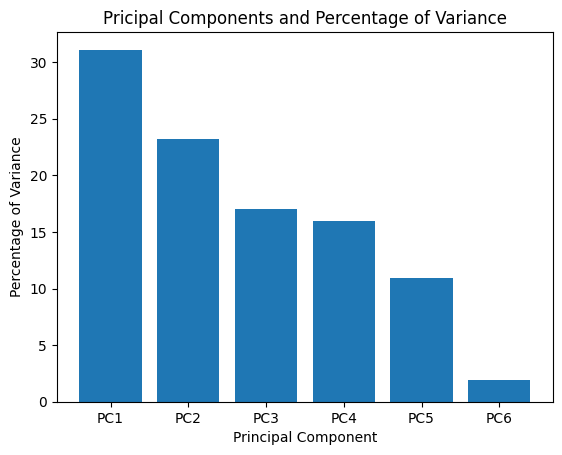

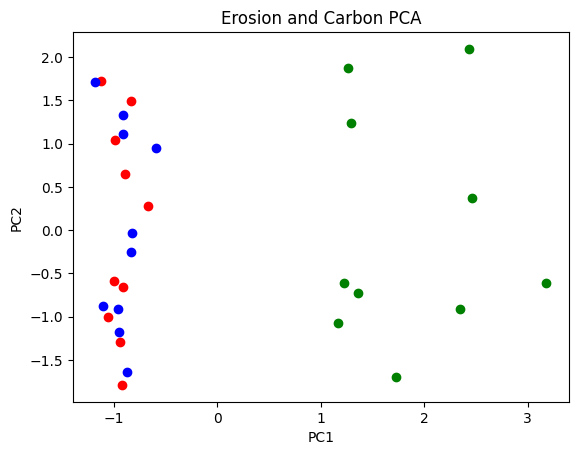

In [83]:
#Dimensionality reduction
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

filename = 'ShoreErosionLagoon.tsv'
df = pd.read_csv(filename, sep='\t')

sc = StandardScaler()
print(sc)
data = df.iloc[:, 4:10]

data_scaled = sc.fit_transform(data)

pca = PCA(n_components=2)
principalcomponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalcomponents)

#Bar graph
fig,ax = plt.subplots()
per_var = np.round(pca_full.explained_variance_ratio_ * 100, decimals=1)
labels = [f'PC{i}' for i in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Variance')
plt.xlabel('Principal Component')
plt.title('Pricipal Components and Percentage of Variance')


#PCA scatter
fig,ax = plt.subplots()
ax.scatter(principalDf.iloc[0:10, 0:1], principalDf.iloc[0:10, 1:2], color="red")
ax.scatter(principalDf.iloc[10:20, 0:1], principalDf.iloc[10:20, 1:2], color="blue")
ax.scatter(principalDf.iloc[20:31, 0:1], principalDf.iloc[20:31, 1:2], color="green")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Erosion and Carbon PCA")
